## Image segmentation - road cracks

####  There are a total of 151 images, & their labels - I want to split it into train(130) & val (rest)

###   Also, I found the images have different sizes, and width is not always greater than height
####  Right now, i have put the first 118 images of same size as train, & rest in test

####  the masks are all in grey-scale. The images are a mix of RGB & grayscale
####  masks & images are of same dimension


####  need a code to  
####           all images in same format
####            i) have width> height (would this change the viewpoint?)
####           ii) convert all to same size
####           pre-processing the masks  (multiple codes; 0-255 coding; RLE in csv files as in Severstal data)


In [ ]:
#######################     check image & mask sizes  ##############################

In [1]:
import pathlib
from PIL import Image
import pandas as pd

pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 10)


In [2]:
def get_image_spec(im_paths):
    path_sorted = sorted([x for x in im_paths])
    all_mode = []
    
    for idx in range(len(path_sorted)):
        im_path = path_sorted[idx]
        img = Image.open(im_path)
        width, height = img.size
        m = img.mode
        #all_size[str(width) + '_' + str(height)] = ''  # saving height width as keys of dict
        all_mode.append([im_path,m, width, height])
        
    all_mode = pd.DataFrame(all_mode, columns=['path','mode', 'width','height'])
    return all_mode

In [3]:
# check image size

im_paths = pathlib.Path('./Imgs/').glob('*.jpg')
image_data = get_image_spec(im_paths)
print(image_data)

             path mode  width  height
0    Imgs\001.jpg  RGB    480     320
1    Imgs\002.jpg  RGB    480     320
2    Imgs\003.jpg  RGB    480     320
3    Imgs\004.jpg  RGB    480     320
4    Imgs\005.jpg  RGB    480     320
5    Imgs\006.jpg  RGB    480     320
6    Imgs\007.jpg  RGB    480     320
7    Imgs\008.jpg  RGB    480     320
8    Imgs\009.jpg  RGB    480     320
9    Imgs\010.jpg  RGB    480     320
10   Imgs\011.jpg  RGB    480     320
11   Imgs\012.jpg  RGB    480     320
12   Imgs\013.jpg  RGB    480     320
13   Imgs\014.jpg  RGB    480     320
14   Imgs\015.jpg  RGB    480     320
15   Imgs\016.jpg  RGB    480     320
16   Imgs\017.jpg  RGB    480     320
17   Imgs\018.jpg  RGB    480     320
18   Imgs\019.jpg  RGB    480     320
19   Imgs\020.jpg  RGB    480     320
20   Imgs\021.jpg  RGB    480     320
21   Imgs\022.jpg  RGB    480     320
22   Imgs\023.jpg  RGB    480     320
23   Imgs\024.jpg  RGB    480     320
24   Imgs\025.jpg  RGB    480     320
25   Imgs\02

In [4]:
# check mask sizes

im_paths = pathlib.Path('./Imgs/').glob('*.png')
mask_data = get_image_spec(im_paths)
print(mask_data)

             path mode  width  height
0    Imgs\001.png    L    480     320
1    Imgs\002.png    L    480     320
2    Imgs\003.png    L    480     320
3    Imgs\004.png    L    480     320
4    Imgs\005.png    L    480     320
5    Imgs\006.png    L    480     320
6    Imgs\007.png    L    480     320
7    Imgs\008.png    L    480     320
8    Imgs\009.png    L    480     320
9    Imgs\010.png    L    480     320
10   Imgs\011.png    L    480     320
11   Imgs\012.png    L    480     320
12   Imgs\013.png    L    480     320
13   Imgs\014.png    L    480     320
14   Imgs\015.png    L    480     320
15   Imgs\016.png    L    480     320
16   Imgs\017.png    L    480     320
17   Imgs\018.png    L    480     320
18   Imgs\019.png    L    480     320
19   Imgs\020.png    L    480     320
20   Imgs\021.png    L    480     320
21   Imgs\022.png    L    480     320
22   Imgs\023.png    L    480     320
23   Imgs\024.png    L    480     320
24   Imgs\025.png    L    480     320
25   Imgs\02

In [11]:
# create a df with unique width & height, & find ratios

df = mask_data.drop_duplicates(['width','height'])
df['ratio'] = df.width/df.height
df

C:\Users\DAR9KOR\AppData\Local\Continuum\anaconda3\envs\fastai_py37\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,path,mode,width,height,ratio
0,Imgs\001.png,L,480,320,1.500000
118,Imgs\119.png,L,1466,1315,1.114829
119,Imgs\120.png,L,1596,926,1.723542
120,Imgs\121.png,L,1451,982,1.477597
121,Imgs\122.png,L,1179,738,1.597561
122,Imgs\123.png,L,882,946,0.932347
123,Imgs\124.png,L,1002,678,1.477876
124,Imgs\125.png,L,990,1108,0.893502
125,Imgs\126.png,L,1204,800,1.505000
126,Imgs\127.png,L,696,866,0.803695


In [ ]:
################################  keep images in appropriate directory structure    #########################################

In [1]:
#    images
#    labels

import shutil
import os

# create lists of image names & mask names
filenames=os.listdir("./train_model/train")

# create 2 separate lists, one with image, one with mask
file_img = [i for i in filenames if '.jpg' in i]
file_msk = [i for i in filenames if '.png' in i]


path = "./train_model/train/"
path_img = "./train_model/train/images/"
path_lbl = "./train_model/train/labels/"

In [8]:
filenames

['001.jpg',
 '001.png',
 '002.jpg',
 '002.png',
 '003.jpg',
 '003.png',
 '004.jpg',
 '004.png',
 '005.jpg',
 '005.png',
 '006.jpg',
 '006.png',
 '007.jpg',
 '007.png',
 '008.jpg',
 '008.png',
 '009.jpg',
 '009.png',
 '010.jpg',
 '010.png',
 '011.jpg',
 '011.png',
 '012.jpg',
 '012.png',
 '013.jpg',
 '013.png',
 '014.jpg',
 '014.png',
 '015.jpg',
 '015.png',
 '016.jpg',
 '016.png',
 '017.jpg',
 '017.png',
 '018.jpg',
 '018.png',
 '019.jpg',
 '019.png',
 '020.jpg',
 '020.png',
 '021.jpg',
 '021.png',
 '022.jpg',
 '022.png',
 '023.jpg',
 '023.png',
 '024.jpg',
 '024.png',
 '025.jpg',
 '025.png',
 '026.jpg',
 '026.png',
 '027.jpg',
 '027.png',
 '028.jpg',
 '028.png',
 '029.jpg',
 '029.png',
 '030.jpg',
 '030.png',
 '031.jpg',
 '031.png',
 '032.jpg',
 '032.png',
 '033.jpg',
 '033.png',
 '034.jpg',
 '034.png',
 '035.jpg',
 '035.png',
 '036.jpg',
 '036.png',
 '037.jpg',
 '037.png',
 '038.jpg',
 '038.png',
 '039.jpg',
 '039.png',
 '040.jpg',
 '040.png',
 '041.jpg',
 '041.png',
 '042.jpg',
 '04

In [2]:
'''def copy_file(start_path,end_path,filelist):
    for i in range(0, len(filelist)):
        f = start_path+filelist[i]
        shutil.copy2(f, end_path)
'''    

In [4]:
# copy files into respective folders - this keeps 2 copies

'''# images
copy_file(path,path_img,file_img)

# masks
copy_file(path,path_lbl,file_msk)'''

In [9]:
# move files; this won't create additional copies

for files in filenames:
    if files.endswith(".jpg"):
        shutil.move(path+files,path_img)
        
for files in filenames:
    if files.endswith(".png"):
        shutil.move(path+files,path_lbl)

In [ ]:
###########################################################################################################3

In [1]:
# auto-updating
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
# library imports
#import shutil
import os
import gc  # garbage collector

In [3]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import numpy as np
import pandas as pd

import torch
import fastai
import time

from fastai.vision import *
from fastai.callbacks.hooks import *
from fastai.utils.mem import *

import matplotlib.pyplot as plt

In [4]:
# set directory

path_lbl = "./train_model/train/labels/"  #path/'labels'
path_img = "./train_model/train/images/"  #path/'images'

In [ ]:
####################################   UNDERSTANDING DATA   ###########################################

In [5]:
## seeing sample images

fnames = get_image_files(path_img)
fnames[:3]

lbl_names = get_image_files(path_lbl)
lbl_names[:3]

[WindowsPath('train_model/train/images/001.jpg'),
 WindowsPath('train_model/train/images/002.jpg'),
 WindowsPath('train_model/train/images/003.jpg')]

[WindowsPath('train_model/train/labels/001.png'),
 WindowsPath('train_model/train/labels/002.png'),
 WindowsPath('train_model/train/labels/003.png')]

In [16]:
# getting mask filename corrs. to an image file

# get_y_fn = lambda x: path_lbl/f'{x.stem}_P{x.suffix}'
# https://forums.fast.ai/t/question-on-get-y-fn/48638
# https://docs.python.org/3/library/pathlib.html?highlight=stem#pathlib.PurePath.stem

def get_y_fn(img_f):
    #name = img_f.split("/")[-1].split(".jpg")[0]
    name = img_f.stem
    name = path_lbl+name+".png"
    return name

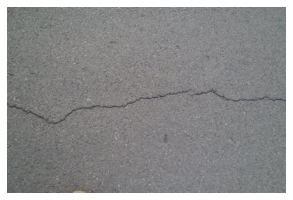

In [7]:
img_f = fnames[0]
img = open_image(img_f)
img.show(figsize=(5,5))

In [18]:
img.data, img.shape, img.size

(tensor([[[0.4745, 0.4196, 0.3765,  ..., 0.4902, 0.4941, 0.4824],
          [0.4275, 0.4039, 0.3961,  ..., 0.4627, 0.4784, 0.4980],
          [0.4314, 0.4275, 0.4353,  ..., 0.4902, 0.4980, 0.5294],
          ...,
          [0.3412, 0.3725, 0.4078,  ..., 0.4471, 0.4745, 0.4824],
          [0.4039, 0.4314, 0.4510,  ..., 0.4745, 0.4745, 0.4431],
          [0.4039, 0.4196, 0.4157,  ..., 0.5176, 0.4941, 0.4392]],
 
         [[0.4941, 0.4392, 0.3961,  ..., 0.5059, 0.5098, 0.4980],
          [0.4471, 0.4235, 0.4157,  ..., 0.4784, 0.4941, 0.5137],
          [0.4510, 0.4471, 0.4549,  ..., 0.5059, 0.5137, 0.5451],
          ...,
          [0.3490, 0.3804, 0.4157,  ..., 0.4627, 0.4902, 0.4980],
          [0.4118, 0.4392, 0.4588,  ..., 0.4902, 0.4902, 0.4588],
          [0.4118, 0.4275, 0.4235,  ..., 0.5333, 0.5098, 0.4549]],
 
         [[0.4784, 0.4235, 0.3804,  ..., 0.5098, 0.5137, 0.5020],
          [0.4314, 0.4078, 0.4000,  ..., 0.4824, 0.4980, 0.5176],
          [0.4353, 0.4314, 0.4392,  ...,

In [19]:
img.data[0] 
# this is 1 channel
# row length = 480
# no. of rows = 320

tensor([[0.4745, 0.4196, 0.3765,  ..., 0.4902, 0.4941, 0.4824],
        [0.4275, 0.4039, 0.3961,  ..., 0.4627, 0.4784, 0.4980],
        [0.4314, 0.4275, 0.4353,  ..., 0.4902, 0.4980, 0.5294],
        ...,
        [0.3412, 0.3725, 0.4078,  ..., 0.4471, 0.4745, 0.4824],
        [0.4039, 0.4314, 0.4510,  ..., 0.4745, 0.4745, 0.4431],
        [0.4039, 0.4196, 0.4157,  ..., 0.5176, 0.4941, 0.4392]])

In [20]:
img.data[0][0]

tensor([0.4745, 0.4196, 0.3765, 0.3843, 0.4039, 0.4196, 0.4392, 0.4627, 0.4863,
        0.4275, 0.4235, 0.4667, 0.4431, 0.3569, 0.3216, 0.3569, 0.4000, 0.4510,
        0.4784, 0.4745, 0.4902, 0.5098, 0.4784, 0.4196, 0.4549, 0.4706, 0.4745,
        0.4549, 0.4392, 0.4431, 0.4510, 0.4549, 0.4902, 0.4902, 0.4745, 0.4471,
        0.4235, 0.4275, 0.4549, 0.4863, 0.4196, 0.5020, 0.5529, 0.5176, 0.4745,
        0.4667, 0.4549, 0.4275, 0.4902, 0.4510, 0.4314, 0.4549, 0.4941, 0.5020,
        0.4745, 0.4510, 0.4471, 0.4431, 0.4745, 0.5059, 0.4627, 0.4039, 0.4353,
        0.5176, 0.4863, 0.5765, 0.4627, 0.3843, 0.5059, 0.5098, 0.4275, 0.4824,
        0.4431, 0.4275, 0.4627, 0.5255, 0.5255, 0.4667, 0.4314, 0.4392, 0.4980,
        0.5059, 0.4549, 0.5137, 0.4980, 0.4353, 0.5255, 0.5529, 0.4824, 0.4745,
        0.4706, 0.4392, 0.5843, 0.6588, 0.5647, 0.6627, 0.6118, 0.5569, 0.5137,
        0.5098, 0.5137, 0.4941, 0.4706, 0.4588, 0.4980, 0.4667, 0.4000, 0.4510,
        0.5098, 0.5216, 0.5412, 0.4941, 

In [36]:
img.data[0][160]

tensor([0.4588, 0.4549, 0.4627, 0.4667, 0.4392, 0.3922, 0.3686, 0.3647, 0.4078,
        0.3412, 0.4000, 0.4824, 0.4588, 0.4392, 0.4431, 0.4078, 0.4941, 0.5294,
        0.5490, 0.5373, 0.5059, 0.4824, 0.4510, 0.4275, 0.3843, 0.4039, 0.4353,
        0.4667, 0.4863, 0.4706, 0.4353, 0.4000, 0.4392, 0.4471, 0.4588, 0.4588,
        0.4588, 0.4667, 0.4863, 0.5059, 0.4588, 0.4627, 0.4941, 0.4510, 0.3843,
        0.4627, 0.5451, 0.5098, 0.4667, 0.5098, 0.5333, 0.4588, 0.3569, 0.3843,
        0.4824, 0.5255, 0.5294, 0.4588, 0.5059, 0.5647, 0.4824, 0.4118, 0.4314,
        0.4549, 0.4941, 0.5333, 0.5176, 0.4784, 0.4863, 0.3961, 0.5098, 0.4824,
        0.5020, 0.4667, 0.4627, 0.4902, 0.4980, 0.4863, 0.5216, 0.5765, 0.5176,
        0.5255, 0.4667, 0.4902, 0.5098, 0.4980, 0.4941, 0.4196, 0.4667, 0.5176,
        0.4392, 0.4118, 0.4588, 0.4824, 0.5020, 0.4549, 0.5255, 0.5255, 0.5255,
        0.5333, 0.5490, 0.5529, 0.5333, 0.5098, 0.5608, 0.4863, 0.5412, 0.5451,
        0.4392, 0.4863, 0.5686, 0.4941, 

In [21]:
img.data[0][0][0]

tensor(0.4745)

In [22]:
len(img.data[0][0])

480

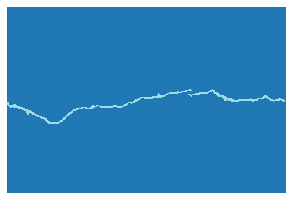

In [17]:
mask = open_mask(get_y_fn(img_f))
mask.show(figsize=(5,5), alpha=1)

In [ ]:
# need to understand how the mask looks like

In [24]:
mask.data, mask.shape, mask.size

(tensor([[[0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          ...,
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0]]]),
 torch.Size([1, 320, 480]),
 torch.Size([320, 480]))

In [34]:
len(mask.data[0][0])  # length of row

480

In [26]:
len(mask.data[0])

320

In [27]:
mask.shape[1:]

torch.Size([320, 480])

In [28]:
np.array(mask.shape[1:])

array([320, 480])

In [29]:
src_size = np.array(mask.shape[1:])
src_size,mask.data

(array([320, 480]),
 tensor([[[0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          ...,
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0]]]))

In [32]:
mask.data[:1]

tensor([[[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]]])

In [40]:
mask.data[0][160]

tensor([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  

####   the mask file is encoded as 0 & 255 - we need to convert this to 0 & 1
####   so open the mask with div=True  - this converts to 0 & 1s

####  https://forums.fast.ai/t/imagemask-data-created-by-open-mask-returns-all-zeros/26622/5
####  https://forums.fast.ai/t/unet-segmentation-mask-converter-to-help-against-common-errors-problems/42949/3

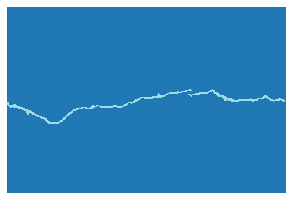

In [37]:
mask2 = open_mask(get_y_fn(img_f), div=True)
mask2.show(figsize=(5,5), alpha=1)

In [38]:
mask2.data, mask2.shape, mask2.size

(tensor([[[0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          ...,
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0]]]),
 torch.Size([1, 320, 480]),
 torch.Size([320, 480]))

In [39]:
mask2.data[0][160]

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [43]:
len(mask.data.flatten())   # = 320*480

153600

In [45]:
mask.data.flatten().unique()

tensor([  0, 255])

In [47]:
mask2.data.flatten().unique()

tensor([0, 1])

####   so we have only 2 labels;
####   check this is the case with all images

In [48]:
for i in range(len(fnames)):
    img_f = fnames[i]
    mask = open_mask(get_y_fn(img_f))
    print(mask.data.flatten().unique())

tensor([  0, 255])
tensor([  0, 255])
tensor([  0, 255])
tensor([  0, 255])
tensor([  0, 255])
tensor([  0, 255])
tensor([  0, 255])
tensor([  0, 255])
tensor([  0, 255])
tensor([  0, 255])
tensor([  0, 255])
tensor([  0, 255])
tensor([  0, 255])
tensor([  0, 255])
tensor([  0, 255])
tensor([  0, 255])
tensor([  0, 255])
tensor([  0, 255])
tensor([  0, 255])
tensor([  0, 255])
tensor([  0, 255])
tensor([  0, 255])
tensor([  0, 255])
tensor([  0, 255])
tensor([  0, 255])
tensor([  0, 255])
tensor([  0, 255])
tensor([  0, 255])
tensor([  0, 255])
tensor([  0, 255])
tensor([  0, 255])
tensor([  0, 255])
tensor([  0, 255])
tensor([  0, 255])
tensor([  0, 255])
tensor([  0, 255])
tensor([  0, 255])
tensor([  0, 255])
tensor([  0, 255])
tensor([  0, 255])
tensor([  0, 255])
tensor([  0, 255])
tensor([  0, 255])
tensor([  0, 255])
tensor([  0, 255])
tensor([  0, 255])
tensor([  0, 255])
tensor([  0, 255])
tensor([  0, 255])
tensor([  0, 255])
tensor([  0, 255])
tensor([  0, 255])
tensor([  0,

In [49]:
for i in range(len(fnames)):
    img_f = fnames[i]
    mask = open_mask(get_y_fn(img_f),div=True)
    print(mask.data.flatten().unique())

tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0, 1])
tensor([0,

In [50]:
# creating the codes, since we don't have a codes.txt file
codes = np.array(['road','crack'])
codes

array(['road', 'crack'], dtype='<U5')

In [53]:
gpu_mem_get_free_no_cache()
'''free = gpu_mem_get_free_no_cache()

# the max size of bs depends on the available GPU RAM
if free > 8200: bs=8
else:           bs=4
print(f"using bs={bs}, have {free}MB of GPU RAM free")'''

0

In [51]:
##  assigning the model parameters
size = src_size//2  # sets size to half of origibal size
bs= 4   # 8

# set seeds
def random_seed(seed_value, use_cuda):  
    np.random.seed(seed_value) 
    torch.manual_seed(seed_value) 
    random.seed(seed_value) 
    torch.backends.cudnn.deterministic = True

    if use_cuda: torch.cuda.manual_seed_all(seed_value) 

# Set seed
random_seed(0,True)#'''

In [ ]:
# where to make changes for image mask, div=True?

# https://stackoverflow.com/questions/59520705/mask-values-in-segmentation-task-are-either-0-or-255-how-do-i-resolve-this
# https://github.com/fastai/fastai/issues/1540     -> did not follow


In [54]:
# creating the data bunch for loading data

# https://github.com/hiromis/notes/blob/master/Lesson3.md
# https://github.com/fastai/course-v3/blob/master/nbs/dl1/lesson3-camvid.ipynb
# https://github.com/fastai/fastai/blob/master/docs_src/data_block.ipynb    -> check here for all options

src = (SegmentationItemList.from_folder(path_img)
       # Where to find the data? -> in path_img and its subfolders
       #.split_by_fname_file('../valid.txt')
       .split_by_rand_pct(valid_pct=0.2, seed=None)
        #How to split in train/valid? -> randomly with the default 20% in valid; since we don't have (& don't need) valid.txt
       .label_from_func(get_y_fn, classes=codes))

In [55]:
data = (src.transform(get_transforms(), size=size, tfm_y=True)
        # size is half of input size, but are we converting it to fit some common input size for network?
        .databunch(bs=bs)
        .normalize(imagenet_stats))

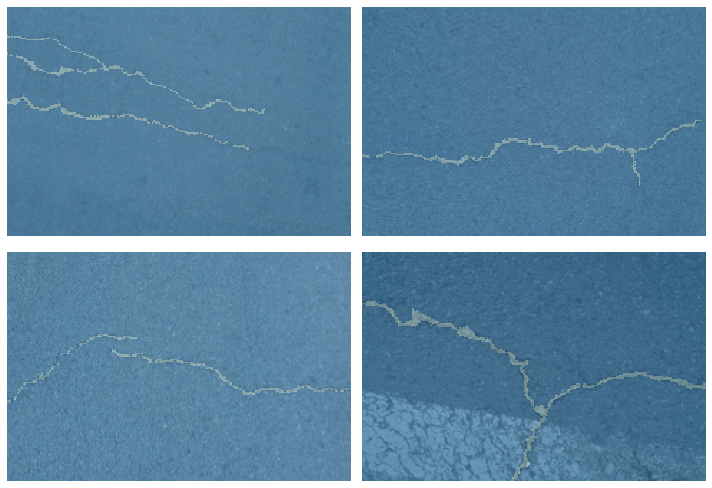

In [58]:
data.show_batch(2, figsize=(10,7))

In [ ]:
#######################   MODEL BUILDING   ################################